## Midterm Exam Python
by Nils Wüstefeld

In [18]:
import numpy as np
import pandas as pd
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from zipfile import ZipFile
from urllib.request import urlopen
from io import BytesIO

In [10]:
 url = 'https://ies-fsv.s3.eu-central-1.amazonaws.com/studentsSets/24094727.zip'

In [13]:
req = requests.get(url).content

In [20]:
resp = urlopen('https://ies-fsv.s3.eu-central-1.amazonaws.com/studentsSets/24094727.zip')
myzip = ZipFile(BytesIO(resp.read()))
myzip.namelist()

['data/INTU.csv', 'data/RL.csv', 'data/SYY.csv', 'data/BXP.csv']

In [22]:
with myzip.open('data/INTU.csv') as f:
    intu = pd.read_csv(f)

In [23]:
with myzip.open('data/RL.csv') as f:
    rl = pd.read_csv(f)

In [24]:
with myzip.open('data/SYY.csv') as f:
    syy = pd.read_csv(f)

In [25]:
with myzip.open('data/BXP.csv') as f:
    bxp = pd.read_csv(f)

In [28]:
intu.head()
#intu.info()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2017-01-03,107.664,108.568,107.438,108.050,1433800,0.00,0.0
1,2017-01-04,108.012,108.879,107.626,108.266,871700,0.00,0.0
2,2017-01-05,108.078,108.982,107.814,108.935,1051400,0.00,0.0
3,2017-01-06,109.171,110.522,108.793,110.361,997200,0.34,0.0
4,2017-01-09,110.389,110.474,109.351,110.030,706400,0.00,0.0


In [29]:
intu[(intu['High'] == intu['Low'])]

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits


In [30]:
rl[(rl['High'] == rl['Low'])]

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits


In [31]:
syy[(syy['High'] == syy['Low'])]

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits


In [32]:
bxp[(bxp['High'] == bxp['Low'])]

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits


No there is no company with no difference in High and low values. As such, all Companies are traded.

In [37]:
print(intu["High"].max())
print(intu["High"].min())

703.152
108.568


In [38]:
print(rl["High"].max())
print(rl["High"].min())

130.467
57.105


In [39]:
print(syy["High"].max())
print(syy["High"].min())

85.643
29.585


In [40]:
print(bxp["High"].max())
print(bxp["High"].min())

116.688
58.232


In [51]:
intu["log_return"] = np.log(intu["Close"])
intu.head()
intu["log_return"].describe()

count    1510.000000
mean        5.581012
std         0.473466
min         4.682594
25%         5.262180
50%         5.566648
75%         5.967763
max         6.524116
Name: log_return, dtype: float64

In [52]:
from scipy.stats import skew 

In [54]:
print("skewness",skew(intu["log_return"], axis=0, bias=True))

skewness -0.11226649113539534


In [60]:
rl["log_return"] = np.log(rl["Close"])
print(rl["log_return"].describe())
print("skewness",skew(rl["log_return"], axis=0, bias=True))

count    1510.000000
mean        4.514391
std         0.205272
min         4.025744
25%         4.347483
50%         4.560847
75%         4.689635
max         4.853935
Name: log_return, dtype: float64
skewness -0.548152597121892


In [59]:
syy["log_return"] = np.log(syy["Close"])
print(syy["log_return"].describe())
print("skewness",skew(syy["log_return"], axis=0, bias=True))

count    1510.000000
mean        4.095206
std         0.206896
min         3.313859
25%         3.929460
50%         4.122948
75%         4.277811
max         4.430448
Name: log_return, dtype: float64
skewness -0.40477644386124334


In [58]:
bxp["log_return"] = np.log(bxp["Close"])
print(bxp["log_return"].describe())
print("skewness",skew(bxp["log_return"], axis=0, bias=True))

count    1510.000000
mean        4.492911
std         0.153130
min         4.048423
25%         4.426818
50%         4.530576
75%         4.601112
max         4.757342
Name: log_return, dtype: float64
skewness -0.9577734144920472


In [ ]:
#task 4 secound hightes gain


In [73]:
intu[intu["log_return"] == intu["log_return"].idxmax()]
#intu[(intu["log_return"].idx() ==]

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,log_return


In [74]:
intu["log_return"].mean()

5.581011758031468

In [77]:
#8
rl["log_return"].head()

0    4.343987
1    4.343870
2    4.326395
3    4.321108
4    4.305969
Name: log_return, dtype: float64

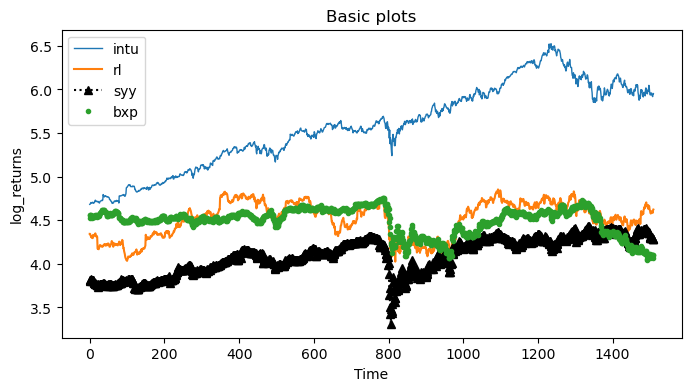

In [76]:
#8 Plot



plt.figure(figsize=(8,4))
plt.plot(intu["log_return"], label='intu',  linewidth=1.0)
plt.plot(rl["log_return"], label='rl')
plt.plot(syy["log_return"],'k^:',label='syy') #dreiecke
plt.plot(bxp["log_return"],'.',label='bxp')

#labeling
plt.xlabel('Time')
plt.ylabel('log_returns')
plt.title("Basic plots")

#Legende
plt.legend(loc = 'best');

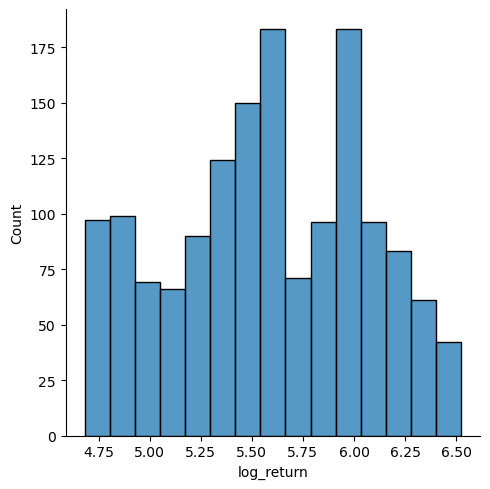

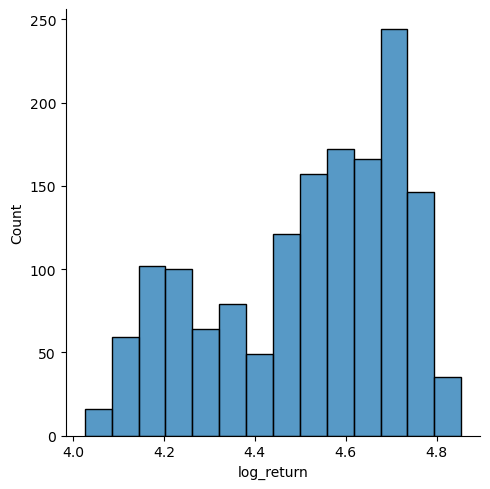

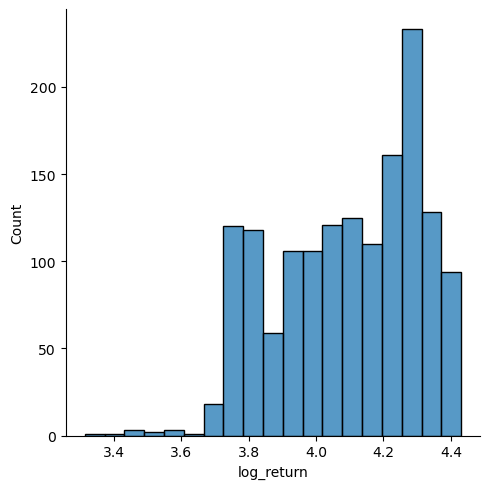

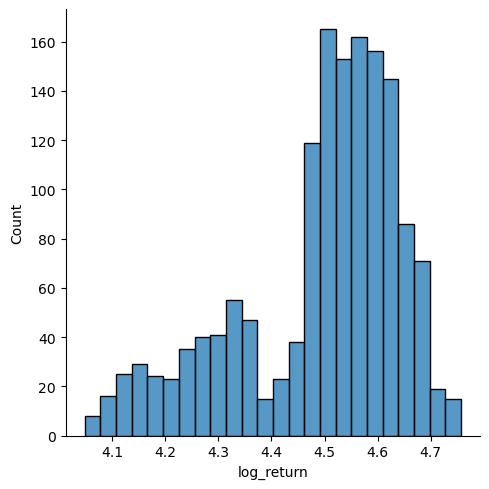

In [82]:
#B
sns.displot(intu["log_return"])
sns.displot(rl["log_return"])
sns.displot(syy["log_return"])
sns.displot(bxp["log_return"])



In [ ]:
#Part 2

In [110]:
url = "https://ies-fsv.s3.eu-central-1.amazonaws.com/companies/companies_no_subindustry.csv"
resp = urlopen(url)
df = pd.read_csv(BytesIO(resp.read()))


In [111]:
df.head()

,Symbol,Security,GICS_Sector,hq,included,Founded
0,MMM,3M,Industrials,"Saint Paul, Minnesota",09.08.1976,1902
1,AOS,A. O. Smith,Industrials,"Milwaukee, Wisconsin",26.07.2017,1916
2,ABT,Abbott,Health Care,"North Chicago, Illinois",31.03.1964,1888
3,ABBV,AbbVie,Health Care,"North Chicago, Illinois",31.12.2012,2013 (1888)
4,ABMD,Abiomed,Health Care,"Danvers, Massachusetts",31.05.2018,1981


In [112]:


notfilledin = df["included"].isnull().sum()
print(f"{notfilledin} companies didn't fill in the date of inclusion")
df = df[~(df['included'].isnull())]

45 companies didn't fill in the date of inclusion


In [100]:
#youngest

print(df[df.Founded == df.Founded.max()])


    Symbol                Security             GICS_Sector  \
481    WBD  Warner Bros. Discovery  Communication Services   

                          hq    included Founded  
481  New York City, New York  11.04.2022    2022  
   Symbol    Security GICS_Sector                       hq    included Founded
71     BK  BNY Mellon  Financials  New York City, New York  31.03.1995    1784


In [101]:
#oldest
print(df[df.Founded == df.Founded.min()])

   Symbol    Security GICS_Sector                       hq    included Founded
71     BK  BNY Mellon  Financials  New York City, New York  31.03.1995    1784


In [108]:
import datetime
data = df.dropna(subset="included")
today = datetime.datetime.today()
year = today.year
oldest = data.loc[data["Founded"] == data["Founded"].min(), "Symbol"]
youngest = data.loc[data["Founded"] == data["Founded"].min(), "Symbol"]
print(f"the oldest company's symbol is {oldest[oldest.index[0]]}")
print(f"the oldest company's symbol is {youngest[youngest.index[0]]}")
data["f"] = data["Founded"].apply(lambda x: x.split()[0])
data["founded"] = data["f"].apply(lambda x: x.split("/")[0])
data["founded"] = data["founded"].apply(lambda x: int(x))
data["age"] = year - data["founded"]
print(f"the average age of companies is {round(data['age'].mean(),2)} years")

the oldest company's symbol is BK
the oldest company's symbol is BK
the average age of companies is 67.76 years


In [105]:
df.groupby(df["GICS_Sector"]).describe()

Symbol                   Security         \
                        count unique   top freq    count unique   
GICS_Sector                                                       
Communication Services     23     23  ATVI    1       23     23   
Consumer Discretionary     52     52   AAP    1       52     52   
Consumer Staples           33     33   ADM    1       33     33   
Energy                     22     22   APA    1       22     22   
Financials                 55     55   AFL    1       55     55   
Health Care                60     60   ABT    1       60     60   
Industrials                66     66   MMM    1       66     66   
Information Technology     68     68   ACN    1       68     68   
Materials                  26     26   APD    1       26     26   
Real Estate                30     30   ARE    1       30     30   
Utilities                  23     23   AES    1       23     23   

                                                                hq         \
                                                    top freq count unique   
GICS_Sector                                                                 
Communication Services              Activision Blizzard    1    23     14   
Consumer Discretionary               Advance Auto Parts    1    52     41   
Consumer Staples                                    ADM    1    33     27   
Energy                                  APA Corporation    1    22     10   
Financials                                        Aflac    1    55     37   
Health Care                                      Abbott    1    60     50   
Industrials                                          3M    1    66     58   
Information Technology                        Accenture    1    68     50   
Materials                    Air Products and Chemicals    1    26     24   
Real Estate             Alexandria Real Estate Equities    1    30     24   
Utilities                               AES Corporation    1    23     22   

                                                       included         \
                                              top freq    count unique   
GICS_Sector                                                              
Communication Services    New York City, New York    8       23     22   
Consumer Discretionary           Atlanta, Georgia    4       52     51   
Consumer Staples                Chicago, Illinois    4       33     24   
Energy                             Houston, Texas   11       22     19   
Financials                New York City, New York   14       55     49   
Health Care                 San Diego, California    3       60     55   
Industrials                      Atlanta, Georgia    3       66     54   
Information Technology       San Jose, California    7       68     67   
Materials               Charlotte, North Carolina    3       26     23   
Real Estate                 Boston, Massachusetts    3       30     30   
Utilities                          Houston, Texas    2       23     15   

                                        Founded                           
                               top freq   count unique          top freq  
GICS_Sector                                                               
Communication Services  18.09.2015    2      23     18  1983 (1877)    2  
Consumer Discretionary  19.12.2011    2      52     44         1993    3  
Consumer Staples        04.03.1957    9      33     33         1902    1  
Energy                  04.03.1957    4      22     19         1919    2  
Financials              30.06.1976    4      55     48         1985    3  
Health Care             04.03.1957    4      60     48         1985    3  
Industrials             04.03.1957    6      66     53         1929    3  
Information Technology  22.06.2020    2      68     46         1998    3  
Materials               04.03.1957    3      26     23         1940    2  
Real Estate             20.03.2017    1      30     24         1994 

([<matplotlib.patches.Wedge at 0x7fb4126ae650>,
 [Text(0.9824937293546878, 0.4946777453845257, 'Information Technology'),
  Text(0.2025607676993733, 1.0811887602953707, 'Industrials'),
  Text(-0.6908833028272607, 0.8559674420645308, 'Health Care'),
  Text(-1.0941825695808445, 0.11298010632611698, 'Financials'),
  Text(-0.8881413728612144, -0.6490030060116807, 'Consumer Discretionary'),
  Text(-0.384089282558408, -1.0307644847508899, 'Consumer Staples'),
  Text(0.08291962850581176, -1.0968702453838641, 'Real Estate'),
  Text(0.4879268426565808, -0.985863781774734, 'Materials'),
  Text(0.7857791165518135, -0.7697734601758179, 'Communication Services'),
  Text(0.9858637303813442, -0.48792694649771123, 'Utilities'),
  Text(1.0874987680638741, -0.16536755866721908, 'Energy')])

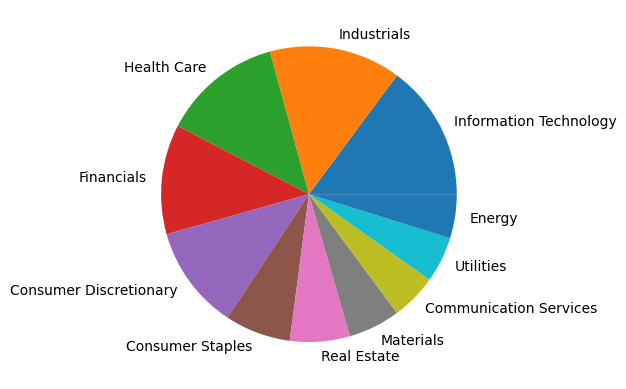

In [106]:
sector = df["GICS_Sector"].value_counts().reset_index()
plt.pie(sector["count"], labels= sector["GICS_Sector"])


In [ ]:
#Part 3

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48],
 [Text(0, 0, ' California'),
  Text(1, 0, ' New York'),
  Text(2, 0, ' Texas'),
  Text(3, 0, ' Illinois'),
  Text(4, 0, ' Pennsylvania'),
  Text(5, 0, ' Massachusetts'),
  Text(6, 0, ' Ohio'),
  Text(7, 0, ' North Carolina'),
  Text(8, 0, ' Georgia'),
  Text(9, 0, ' New Jersey'),
  Text(10, 0, ' Virginia'),
  Text(11, 0, ' Florida'),
  Text(12, 0, ' Minnesota'),
  Text(13, 0, ' Connecticut'),
  Text(14, 0, ' Washington'),
  Text(15, 0, ' Michigan'),
  Text(16, 0, ' Tennessee'),
  Text(17, 0, ' Colorado'),
  Text(18, 0, ' Ireland'),
  Text(19, 0, ' Missouri'),
  Text(20, 0, ' Indiana'),
  Text(21, 0, ' Wisconsin'),
  Text(22, 0, ' Arizona'),
  Text(23, 0, ' Maryland'),
  Text(24, 0, ' Nevada'),
  Text(25, 0

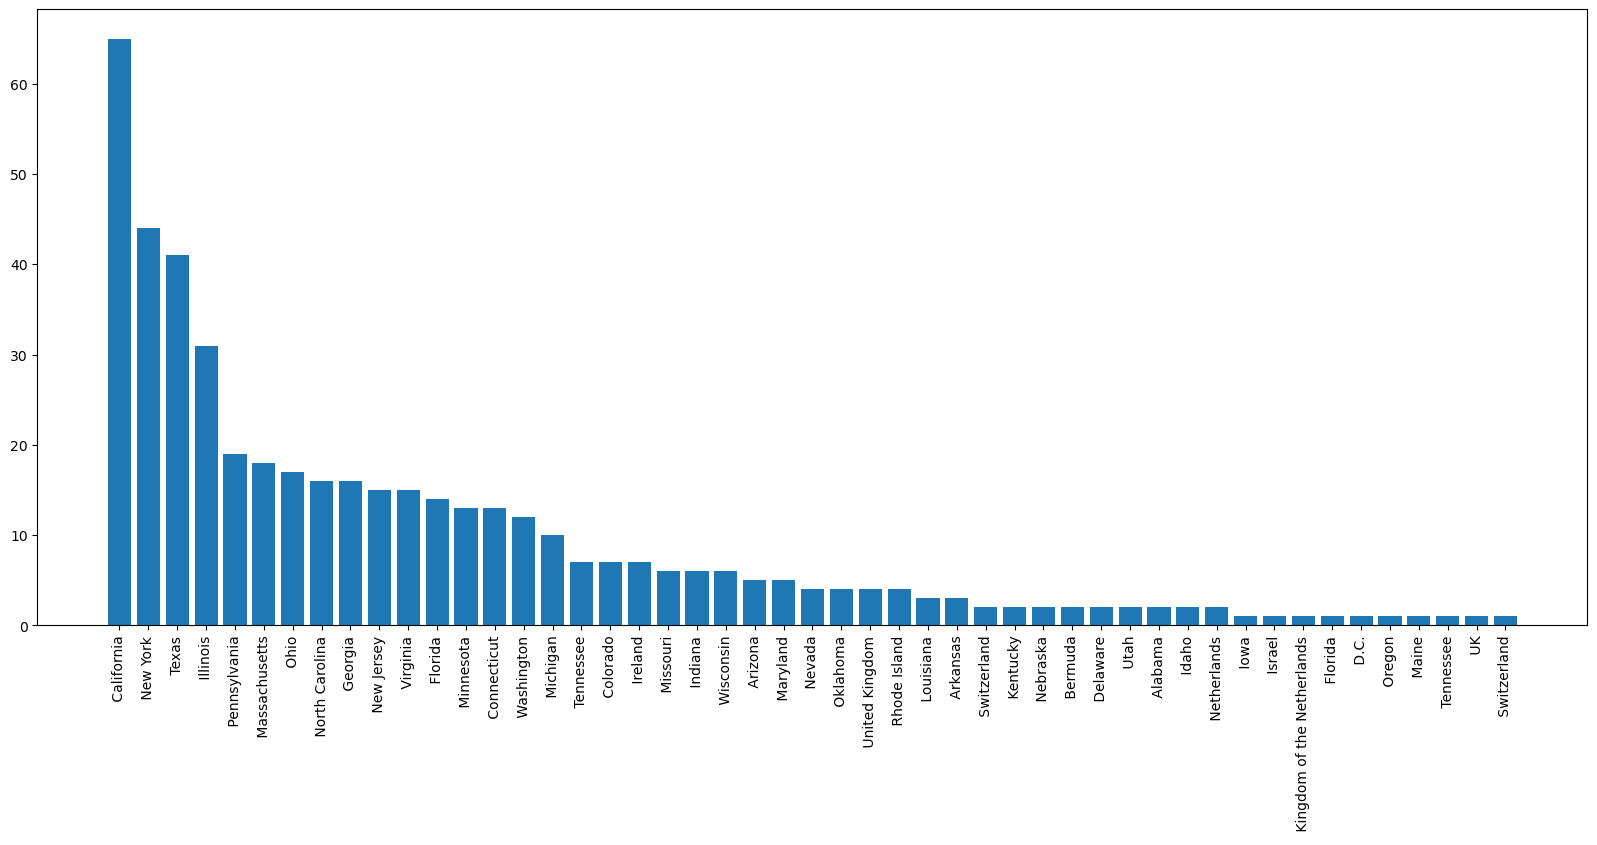

In [113]:
data["state"] = data["hq"].apply(lambda x: x.split(",")[-1])
states = data["state"].value_counts().reset_index()
plt.subplots(1,1, figsize = (20,8))
plt.bar(states["state"], states["count"])
plt.xticks(rotation = 90)

In [115]:
import io
url2 = "https://ies-fsv.s3.eu-central-1.amazonaws.com/companies/companies_subindustry.csv"
req2 = requests.get(url2).content
data2 =pd.read_csv(io.StringIO(req2.decode('utf-8')))

In [116]:
new_df = data.merge(data2, on="Symbol")

In [123]:
#random variables
#generate random 5 data of std normal distr:
np.random.seed(1234)
#normal:
v1 = np.random.randn(1)
#t-distr:
v2 = np.random.standard_t(4, 1)
#uniform
v3 = np.random.uniform(10, 11, 1)

v4 = np.random.beta(1,2,1)
